In [1]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
     


In [6]:
import chardet

with open('E:\\web scrapping\\customer_booking.csv', 'rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)
     


{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [8]:
df= pd.read_csv("E:\\web scrapping\\customer_booking.csv", encoding='ISO-8859-1')

In [9]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [10]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [11]:
df.shape

(50000, 14)

In [14]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [15]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [16]:
x = df.drop('booking_complete',axis=1)
y = df.booking_complete

In [17]:
for colname in x.select_dtypes("object"):
    x[colname],_ = x[colname].factorize()

In [18]:
x.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
route                      int64
booking_origin             int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
dtype: object

In [19]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x,y)
mi_scores = pd.Series(mi_scores,name="MI Scores",index=x.columns)
mi_scores = mi_scores.sort_values(ascending= False)

mi_scores

route                    0.051588
booking_origin           0.048844
flight_duration          0.017681
wants_extra_baggage      0.009363
num_passengers           0.005781
length_of_stay           0.005321
flight_hour              0.003888
wants_in_flight_meals    0.003706
wants_preferred_seat     0.003486
sales_channel            0.003145
flight_day               0.002475
purchase_lead            0.002124
trip_type                0.001031
Name: MI Scores, dtype: float64

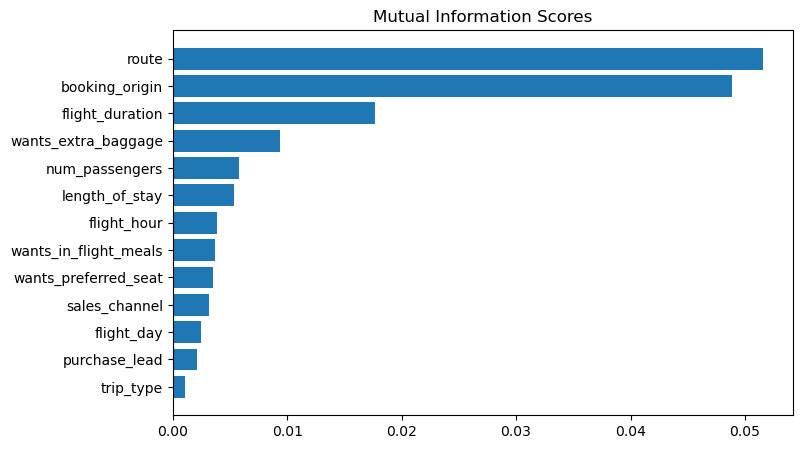

In [21]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)
     

In [24]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [25]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [26]:

df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [27]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


Make a new feature
Because we want to know customer behavior to have a trip on holiday (weekend), so let's make a feature called is_weekend. if the flight day is Saturday or Sunday we give is_weekend value = 1, for another flight day we give it 0

In [28]:
is_weekend = []

for i in range(len(df)):
    if df['flight_day'][i] == 6 or df['flight_day'][i] == 7:
        is_weekend.append(1)
    else:
        is_weekend.append(0)

df['is_weekend'] = is_weekend
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,0


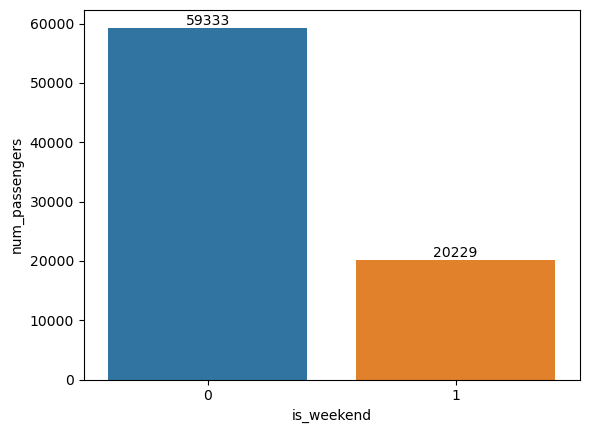

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

weekend = df.groupby('is_weekend')['num_passengers'].sum().reset_index()
ax = sns.barplot(data = weekend, x= 'is_weekend', y= 'num_passengers')
ax.bar_label(ax.containers[0])
plt.show()

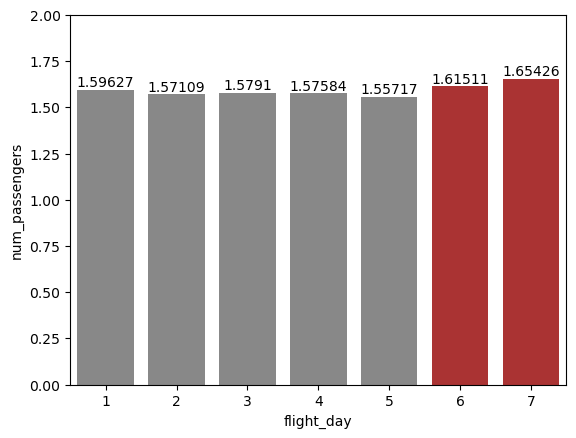

In [30]:
dayperday = df.groupby('flight_day')['num_passengers'].mean().reset_index()

ax = sns.barplot(data = dayperday, x= 'flight_day', y= 'num_passengers')
for bar in ax.patches:
    bar.set_facecolor('#888888')
    
ax.bar_label(ax.containers[0])
plt.ylim(0,2)
ax.patches[5].set_facecolor('#aa3333')
ax.patches[6].set_facecolor('#aa3333')
plt.show()

As we can see from the two graphs above, on weekends the number of passengers is less than on weekdays, but if we look at the average number of passengers, weekends have a higher value than weekdays, so it is suggested that we need see the number of flights from day to day

In [33]:
df['flight_day'].value_counts().reset_index()

,flight_day,count
0,1,8102
1,3,7674
2,2,7673
3,4,7424
4,5,6761
5,7,6554
6,6,5812


From the table above, we can see that weekends have fewer flights than weekdays, so we need to consider adding flight schedules on weekends. but to be effective we need to see what routes have schedules on weekends with the most passengers.

In [35]:
route = df[df['is_weekend'] == 1].groupby('route').agg({'num_passengers' : 'sum'}).reset_index().sort_values(by='num_passengers', ascending=False)

In [37]:
route[:5]

,route,num_passengers
4,AKLKUL,1284
243,DMKKIX,462
606,PENTPE,396
375,ICNSIN,311
538,MELSGN,306


From the table above we can see the top 5 routes that have the most passengers, so my recommendation is that we increase the number of flights to these five routes on weekends.

In [39]:

df['route'].value_counts()

route
AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

As we can see, route have 799 unique value and that is to big, so we can delete route column

In [40]:
df.drop('route',axis=1, inplace=True)

In [41]:
df["booking_origin"].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

the booking origin column also has many unique values, but because I don't want to delete the information on the origin of the booking, I will change the value of the booking origin, which initially contains the name of the country to the name of the continent

In [43]:
!pip install pycountry-convert

import pycountry_convert as pc

continent = []
index = []

df['booking_origin'] =  df['booking_origin'].replace('Myanmar (Burma)', 'Myanmar')

for i in range(len(df)):
    country = df['booking_origin'][i]
    #print(country)
    try :
        country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
        continent_name = pc.country_alpha2_to_continent_code(country_code)
        continent.append(continent_name)
    except:
        continent.append('Others')

df['booking_continent'] = continent

   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   - -------------------------------------- 0.2/6.3 MB 3.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.3/6.3 MB 4.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/6.3 MB 3.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.5/6.3 MB 3.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.5/6.3 MB 2.2 MB/s eta 0:00:03
   --- ------------------------------------ 0.6/6.3 MB 2.2 MB/s eta 0:00:03
   ---- ----------------------------------- 0.7/6.3 MB 2.4 MB/s eta 0:00:03
   ---- ----------------------------------- 0.8/6.3 MB 2.1 MB/s eta 0:00:03
   ------ --------------------------------- 1.0/6.3 MB 2.3 MB/s eta 0:00:03
   ------ --------------------------------- 1.1/6.3 MB 2.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.1/6.3 MB 2.4 MB/s eta 0:00:03
   ------- -------------------------------- 1.2/6.3 MB 2.2 MB/s eta 0:00:03
   -------- -------

In [44]:
df["booking_origin"].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

In [45]:
df["booking_continent"].value_counts()

booking_continent
AS        29740
OC        18960
EU          578
NA          525
Others       87
AF           69
SA           41
Name: count, dtype: int64

In [46]:
df.drop('booking_origin',axis=1, inplace=True)

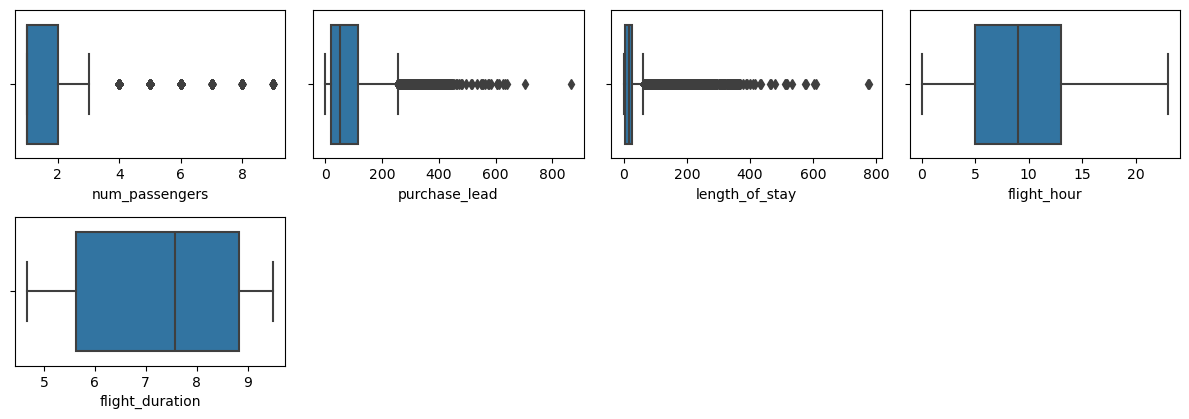

In [47]:
#Let's see outlier on numeric column

num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(data=df[num], x=df[column])
    plt.tight_layout()

as we can see, on purchase lead and length of stay have a lot of outlier values, so we will delete outlier wtih zscore so that not many columns are wasted

In [49]:
from scipy import stats
import numpy as np

print(f'Total rows before delete outlier : {len(df)}')

filtered_entries = np.array([True] * len(df))

for col in num:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    df = df[filtered_entries]
    
print(f'Total rows after delete outlier : {len(df)}')

Total rows before delete outlier : 50000
Total rows after delete outlier : 47115


Feature Transformation
Now let's look at the distribution of numerical data

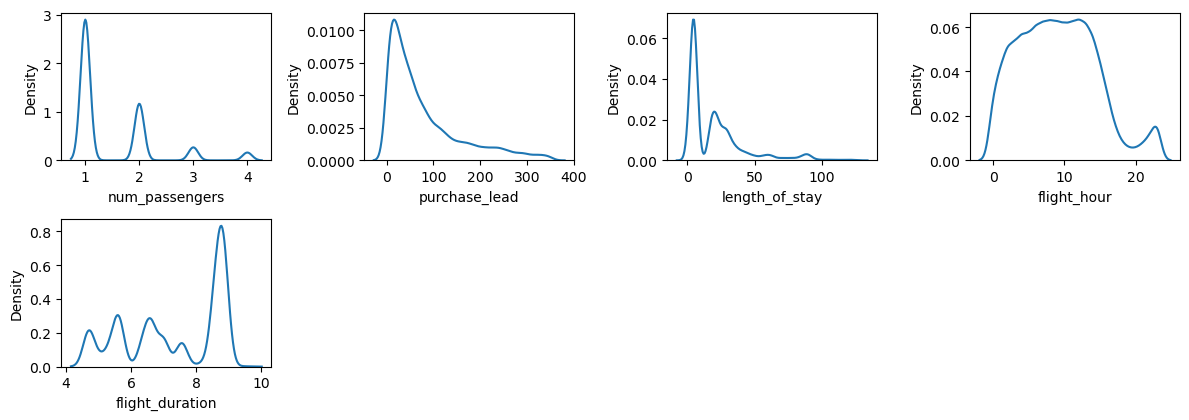

In [50]:
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=df[num], x=df[column])
    plt.tight_layout()


In [51]:
from sklearn import preprocessing

label_encode = ["sales_channel"]
one_hot = ["booking_continent"]

mapping_trip_type = {
    'RoundTrip'  : 0,
    'OneWay'     : 1,
    'CircleTrip' : 2
}               

df["trip_type"] = df["trip_type"].map(mapping_trip_type)

df["sales_channel"] = preprocessing.LabelEncoder().fit_transform(df["sales_channel"])
onehots = pd.get_dummies(df["booking_continent"],prefix='booking_continet')

df = df.join(onehots)


df.drop('booking_continent', axis=1, inplace=True)

In [52]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,is_weekend,booking_continet_AF,booking_continet_AS,booking_continet_EU,booking_continet_NA,booking_continet_OC,booking_continet_Others,booking_continet_SA
0,2,0,0,262,19,7,6,1,0,0,5.52,0,1,False,False,False,False,True,False,False
1,1,0,0,112,20,3,6,0,0,0,5.52,0,1,False,False,False,False,True,False,False
2,2,0,0,243,22,17,3,1,1,0,5.52,0,0,False,True,False,False,False,False,False
3,1,0,0,96,31,4,6,0,0,1,5.52,0,1,False,False,False,False,True,False,False
4,2,0,0,68,22,15,3,1,0,1,5.52,0,0,False,True,False,False,False,False,False


In [53]:
#split data

from sklearn.model_selection import train_test_split

x = df.drop(columns=["booking_complete"],axis=1)
y = df["booking_complete"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [54]:
y_train.value_counts(normalize=True)

booking_complete
0    0.851136
1    0.148864
Name: proportion, dtype: float64

The Data is unbalance, so we need to balancing it with sampling.

In [55]:
#Sampling Data
#Over sampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(x_train, y_train.ravel())

In [57]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_over)
  
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred)) 
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_over, y_pred_train))

Accuracy (Test Set): 0.84
Precision (Test Set): 0.34
Recall (Test Set): 0.04
F1-Score (Test Set): 0.07
roc_auc (test-proba): 0.51
roc_auc (train-proba): 0.53


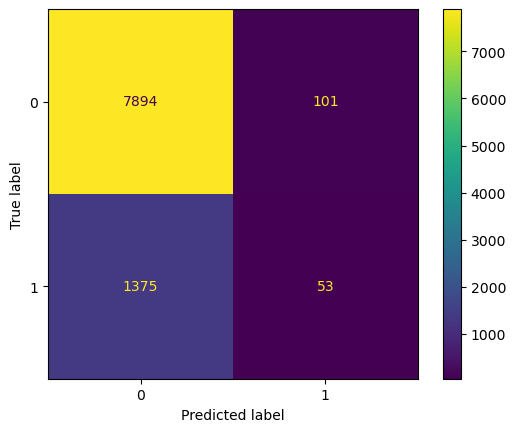

In [58]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(x_train,y_train)
predictions = clf.predict(x_test)
confusionmatrix(predictions)
eval_classification(clf)

In [59]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(x_over, y_over)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.79
Precision (Test Set): 0.27
Recall (Test Set): 0.23
F1-Score (Test Set): 0.25
roc_auc (test-proba): 0.56
roc_auc (train-proba): 0.99


              precision    recall  f1-score   support

           0       0.87      0.89      0.88      7995
           1       0.27      0.23      0.25      1428

    accuracy                           0.79      9423
   macro avg       0.57      0.56      0.56      9423
weighted avg       0.78      0.79      0.78      9423



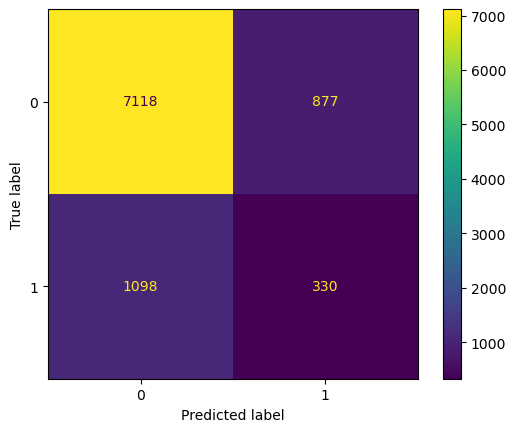

In [60]:
predictions = xg_tuned.predict(x_test)
confusionmatrix(predictions)
print(classification_report(y_test, predictions))

<Axes: >

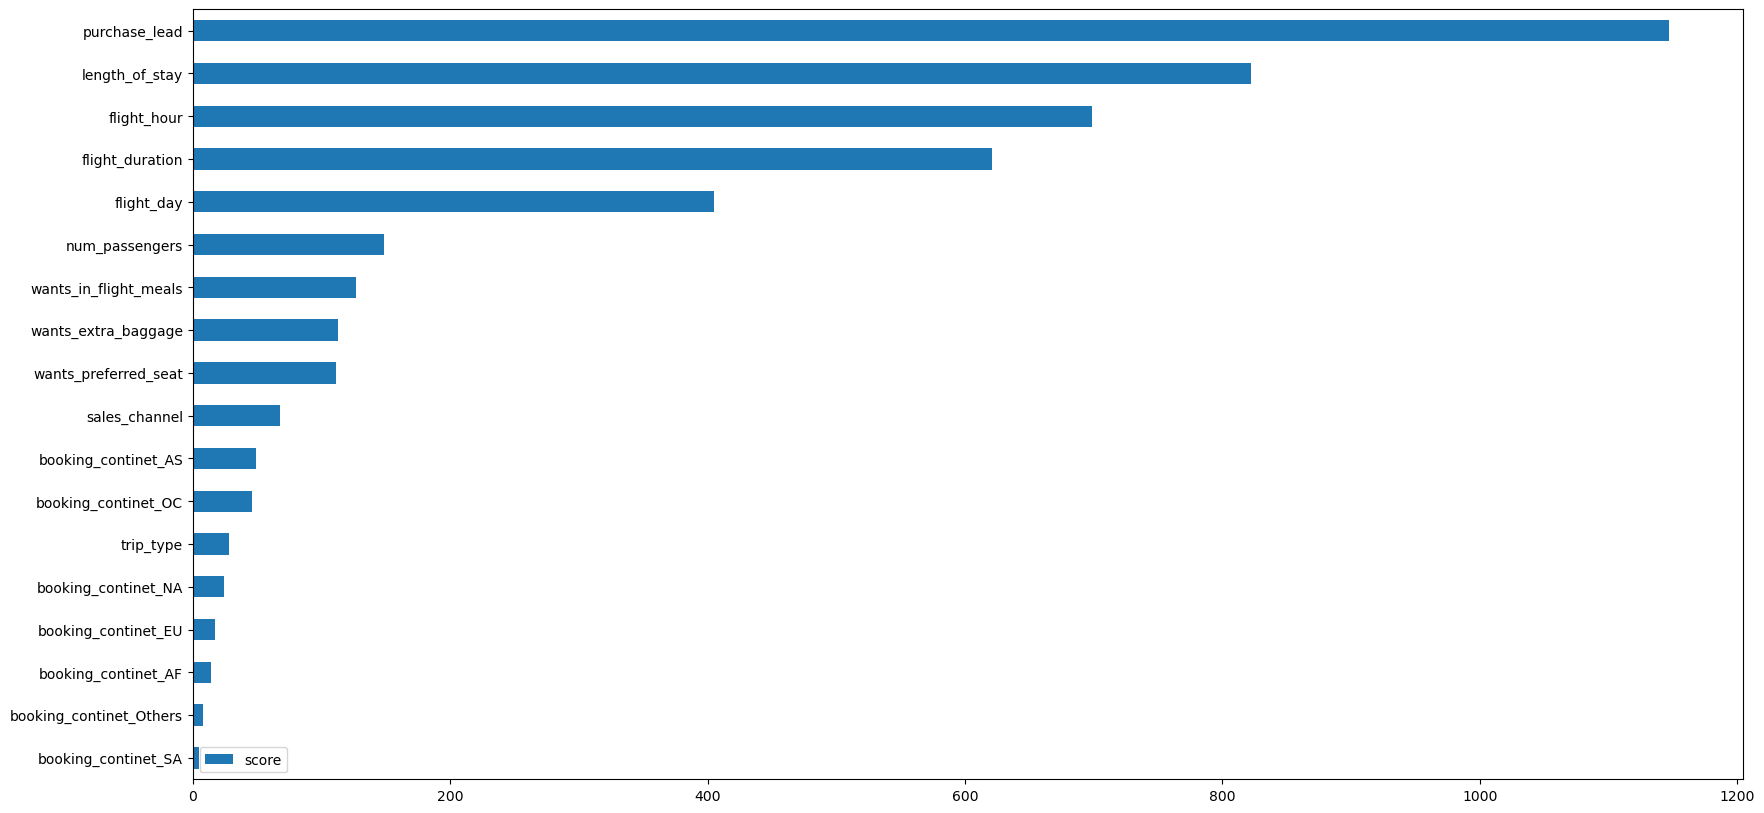

In [61]:
#Features Importance
feature_important = clf.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=True)
data.nlargest(40, columns="score").sort_values(by = "score", ascending=True).plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [68]:
data.index

Index(['booking_continet_SA', 'booking_continet_Others', 'booking_continet_AF',
       'booking_continet_EU', 'booking_continet_NA', 'trip_type',
       'booking_continet_OC', 'booking_continet_AS', 'sales_channel',
       'wants_preferred_seat', 'wants_extra_baggage', 'wants_in_flight_meals',
       'num_passengers', 'flight_day', 'flight_duration', 'flight_hour',
       'length_of_stay', 'purchase_lead'],
      dtype='object')